<a href="https://colab.research.google.com/github/deepali2062/-Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><u>Problem Statement: </u></b>

####During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


####In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
####Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

####Personal recommendation systems have been emerged to conduct effective search which related booksbased on user rating and interest.The proposed system used the K-NN Cosine Distance function to measure distance and Cosine Similarity function to find Similarity between the book clusters also we implemented SVD system that give us good recommandation.

## **About Recommendation Engines**
A recommendation engine, also known as a recommender system, is software that analyzes available data to make suggestions for something that a user might be interested in.

A recommendation engine can be used for recommending other products besides books; for example a recommendation engine can be used to suggest movies or t-shirts or any other product based on things like similar customers who bought similar products. On Amazon’s ecommerce website, you can see an area populated by a recommendation engine, it’s the area that you see “Customers who viewed this item also viewed” and “Customers who bought this item also bought” lists.

A recommendation system is usually built using 3 techniques which are **content-based filtering, collaborative filtering, and a combination of both**.

* **Content-based filtering**: 
The algorithm recommends a product that is similar to those which used as watched. In simple words, In this algorithm, we try to find finding item look alike. For example, a person likes to watch Sachin Tendulkar shots, so he may like watching Ricky Ponting shots too because the two videos have similar tags and similar categories.
Only it looks similar between the content and does not focus more on the person who is watching this. Only it recommends the product which has the highest score based on past preferences.

* **Collaborative filtering:**
Collaborative based filtering recommender systems are based on past interactions of users and target items.  In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has watched A, B, and C movie. And Y user has watched B, C, and D movie then we will recommend A movie to Y user and D movie to X user.
Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it.

* **Hybrid Filtering Method:**
It is basically a combination of both the above methods. It is a too complex model which recommends product based on your history as well based on similar users like you.
There are some organizations that use this method like Facebook which shows news which is important for you and for others also in your network and the same is used by Linkedin too.


###In this project, we will use the **Collaborative based filtering** method to build a book recommender system.

##**Dataset Description**
The Book-Crossing dataset comprises 3 files which contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

* **Users**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
*  **Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.
*  **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

### Import Lib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import pickle
import operator
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#!pip install dataprep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rating = pd.read_csv('/content/drive/MyDrive/capstone project/Book_Recommender_System/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/capstone project/Book_Recommender_System/Users.csv')
books = pd.read_csv('/content/drive/MyDrive/capstone project/Book_Recommender_System/Books.csv', encoding = "ISO-8859-1",delimiter=';',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Finding nun value

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

THERE ARE SOME MISSING VALUES

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

IN USER DATA SET COLUMN 'AGE' HAVE 50 % MISSING VALUE BUT THE GOOD NEWS IS WE ARE NOT USING 'AGE' COLUMN

In [ ]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#FINDING DUPLICATE 

In [ ]:
books.duplicated().sum()

0

In [ ]:
rating.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

THERE IS N DUPLICATE VALUE

In [ ]:
#from dataprep.eda import plot
#from dataprep.eda import plot_correlation
#from dataprep.eda import plot_missing
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report

In [ ]:
#plot_missing(rating)

In [ ]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...


In [ ]:
#Drop Unwanted Columns
books=books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-L']]

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


# Featrue Engineering

In [ ]:
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher','Image-URL-L':'url'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Users Dataset

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


CHANGING COLUMN NAMES

In [ ]:
users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)

In [ ]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.describe()

,user_id,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
mean_value=users['age'].mean()
users['age'].fillna(value=mean_value, inplace=True)

In [ ]:
users.isnull().sum()

user_id     0
location    0
age         0
dtype: int64

THERE IS NO NAN VALUE

In [ ]:
for i in users:
    users['Country']=users.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
users.head()

,user_id,location,age,Country
0,1,"nyc, new york, usa",34.751434,usa
1,2,"stockton, california, usa",18.000000,usa
2,3,"moscow, yukon territory, russia",34.751434,russia
3,4,"porto, v.n.gaia, portugal",17.000000,portugal
4,5,"farnborough, hants, united kingdom",34.751434,united kingdom


In [ ]:
users.drop('location',axis=1,inplace=True)

In [ ]:
users.head()

,user_id,age,Country
0,1,34.751434,usa
1,2,18.000000,usa
2,3,34.751434,russia
3,4,17.000000,portugal
4,5,34.751434,united kingdom


checking nan value

In [ ]:
users.isnull().sum()

user_id      0
age          0
Country    368
dtype: int64

In [ ]:
users=users.dropna()

In [ ]:
users.isnull().sum()

user_id    0
age        0
Country    0
dtype: int64

Ratings 

In [ ]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating.rename(columns={'User-ID':'user_id','Book-Rating':'bookrating'},inplace=True)

In [ ]:
rating.head()

,user_id,ISBN,bookrating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
rating.isnull().sum()

user_id       0
ISBN          0
bookrating    0
dtype: int64

Chaking Data shape

In [ ]:
print("Books_dataset--->>>" , books.shape )
print("Users_dataset--->>>" , users.shape )
print("Ratings_dataset--->>>"  ,rating.shape )

Books_dataset--->>> (271360, 6)
Users_dataset--->>> (278490, 3)
Ratings_dataset--->>> (1149780, 3)


considering for more than rated are 50 Books

In [ ]:
x=rating['user_id'].value_counts() > 50

In [ ]:
x.value_counts()

False    101912
True       3371
Name: user_id, dtype: int64

In [ ]:
x[x].shape # HERE WE SEE ONLY TRUE VALUE ITS MEANS MORE THAN 50 RATED COUNT

(3371,)

In [ ]:
y=x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            195079, 239486,  63506, 220911, 187613,  90105, 109040, 137803,
             83034, 190939],
           dtype='int64', length=3371)

In [ ]:
rating=rating[rating['user_id'].isin(y)] #isin:Whether each element in the DataFrame is contained in values{50 RATED COUNT}
rating

,user_id,ISBN,bookrating
173,276847,0446364193,0
174,276847,3257200552,5
175,276847,3379015180,0
176,276847,3404145909,8
177,276847,3404148576,8
...,...,...,...
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149746,276688,1551669315,6
1149747,276688,1575660792,7


Marge Datasets

In [ ]:
#ratings_with_books=rating.merge(books,on='ISBN')
#ratings_with_books

In [ ]:
ratings_with_books=rating.merge(books,on='ISBN')
ratings_with_books=users.merge(ratings_with_books,on='user_id')
ratings_with_books.head()

,user_id,age,Country,ISBN,bookrating,title,author,year,publisher,url
0,183,27.0,portugal,2070567842,8,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse,http://images.amazon.com/images/P/2070567842.0...
1,183,27.0,portugal,225314696X,0,Contes de fÃ?Â©es Ã?Â l'usage des moyennes pe...,Boris Vian,2002,LGF,http://images.amazon.com/images/P/225314696X.0...
2,183,27.0,portugal,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp; Janes Editores, S.A.",http://images.amazon.com/images/P/8401422825.0...
3,183,27.0,portugal,8420639133,0,Temor y Temblor,Soren Kierkegaard,2001,Alianza,http://images.amazon.com/images/P/8420639133.0...
4,183,27.0,portugal,8433920081,0,El Almuerzo Desnudo,William S. Burroughs,1995,Anagrama,http://images.amazon.com/images/P/8433920081.0...


In [ ]:
ratings_with_books.shape

(689559, 10)

In [ ]:
number_rating=ratings_with_books.groupby('title')['bookrating'].count()
number_rating

title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?bermorgen.                                                                                                1
Ã?Â?berraschung am Valentinstag.                                                                              1
Ã?Â?rger mit Produkt X. Roman.                                                                    

In [ ]:
number_rating=ratings_with_books.groupby('title')['bookrating'].count().reset_index()
number_rating

,title,bookrating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
197582,Ã?Â?bermorgen.,1
197583,Ã?Â?berraschung am Valentinstag.,1
197584,Ã?Â?rger mit Produkt X. Roman.,3
197585,Ã?Â?stlich der Berge.,1


In [ ]:
number_rating.rename(columns={'bookrating':'number of ratings'},inplace=True)
number_rating

,title,number of ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
197582,Ã?Â?bermorgen.,1
197583,Ã?Â?berraschung am Valentinstag.,1
197584,Ã?Â?rger mit Produkt X. Roman.,3
197585,Ã?Â?stlich der Berge.,1


In [ ]:
final_rating=ratings_with_books.merge(number_rating,on='title')
final_rating.head(1)

,user_id,age,Country,ISBN,bookrating,title,author,year,publisher,url,number of ratings
0,183,27.0,portugal,2070567842,8,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,0,Gallimard-Jeunesse,http://images.amazon.com/images/P/2070567842.0...,4


Only those Ratings consider for more than 20 Ratings avilable for book

In [ ]:
final_rating['number of ratings']

0         4
1         4
2         4
3         4
4         1
         ..
689554    1
689555    1
689556    1
689557    1
689558    1
Name: number of ratings, Length: 689559, dtype: int64

In [ ]:
final_rating=final_rating[final_rating['number of ratings']>=20]
final_rating

,user_id,age,Country,ISBN,bookrating,title,author,year,publisher,url,number of ratings
5,183,27.000000,portugal,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp; Janes Editores, S.A.",http://images.amazon.com/images/P/8401422825.0...,224
6,1848,22.000000,usa,0345342968,10,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,224
7,3346,20.000000,iran,0345342968,0,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,224
8,3757,34.751434,spain,8401422345,0,Fahrenheit 451,Ray Bradbury,1994,Aims Intl Books Corp,http://images.amazon.com/images/P/8401422345.0...,224
9,4157,39.000000,usa,0345292340,0,Fahrenheit 451,Ray Bradbury,1979,Del Rey Books,http://images.amazon.com/images/P/0345292340.0...,224
...,...,...,...,...,...,...,...,...,...,...,...
516799,235105,46.000000,usa,0380769840,0,Ashes in the Wind,Kathleen E. Woodiwiss,1981,Avon,http://images.amazon.com/images/P/0380769840.0...,23
516800,246671,27.000000,australia,0380769840,0,Ashes in the Wind,Kathleen E. Woodiwiss,1981,Avon,http://images.amazon.com/images/P/0380769840.0...,23
516801,249862,34.751434,usa,0380769840,0,Ashes in the Wind,Kathleen E. Woodiwiss,1981,Avon,http://images.amazon.com/images/P/0380769840.0...,23
516802,264082,42.000000,usa,0380769840,5,Ashes in the Wind,Kathleen E. Woodiwiss,1981,Avon,http://images.amazon.com/images/P/0380769840.0...,23


In [ ]:
#Removing Duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [ ]:
final_rating.shape

(231799, 11)

In [ ]:
final_rating.isnull().sum()

user_id              0
age                  0
Country              0
ISBN                 0
bookrating           0
title                0
author               0
year                 0
publisher            0
url                  0
number of ratings    0
dtype: int64

#EDA

Text(0.5, 1.0, 'Top publisher')

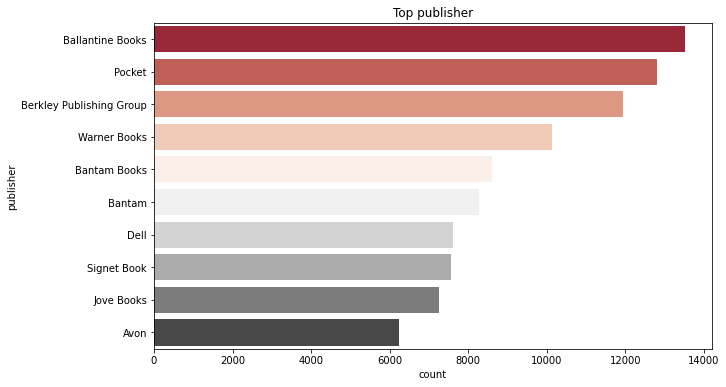

In [ ]:
#Top 10 Publisher
plt.figure(figsize=(10,6))
sns.countplot(y='publisher',data=final_rating,order=pd.value_counts(final_rating['publisher']).iloc[:10].index,palette='RdGy',)
plt.title('Top publisher')

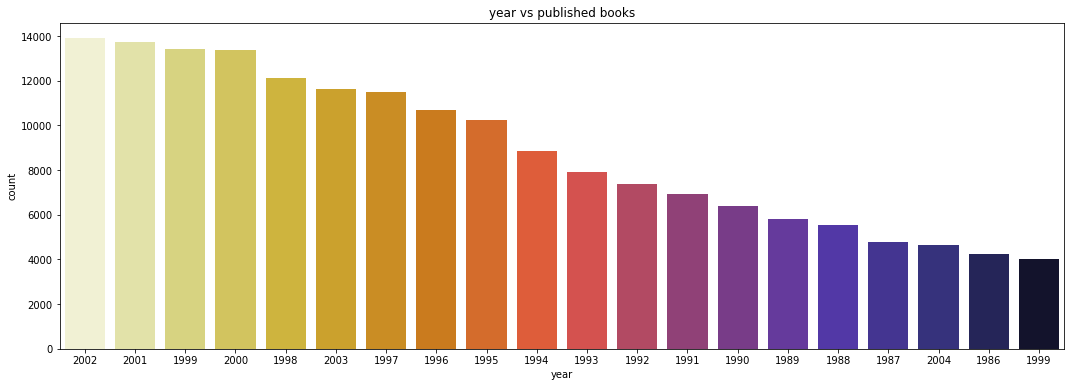

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='year',data=books,order=pd.value_counts(books['year']).iloc[:20].index, palette = sns.color_palette('CMRmap_r',20))
plt.title('year vs published books')
plt.show()

Text(0.5, 1.0, 'Top Authors')

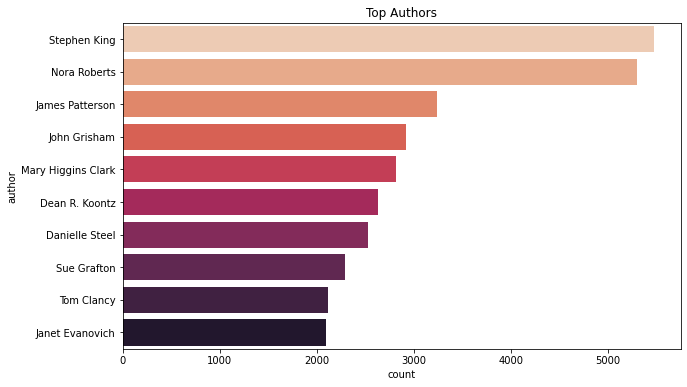

In [ ]:
#Top 10 Authors
plt.figure(figsize=(10,6))
sns.countplot(y='author',data=final_rating,order=pd.value_counts(final_rating['author']).iloc[:10].index,palette='rocket_r',)
plt.title('Top Authors')

Text(0.5, 1.0, 'Ratings')

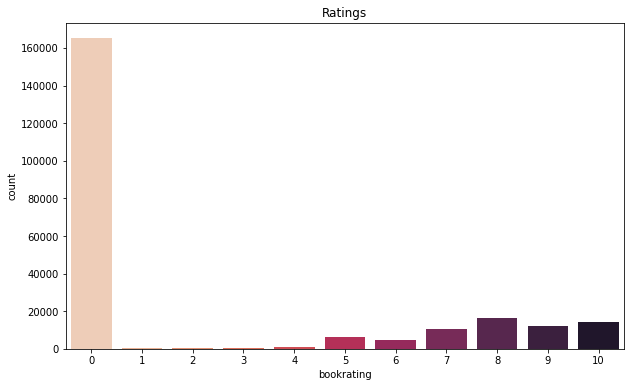

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="bookrating", data=final_rating,palette='rocket_r')
plt.title("Ratings")

huge amount people are nat given a rating

Text(0.5, 1.0, 'Ratings')

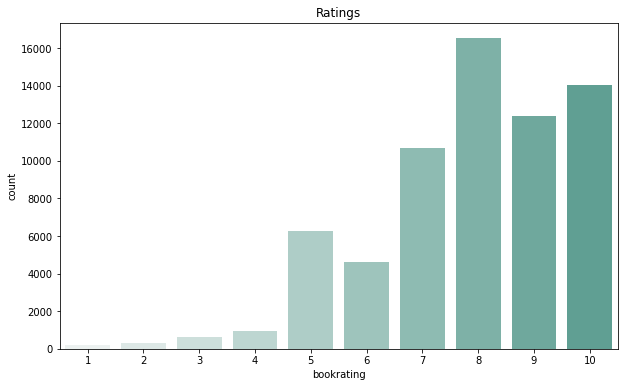

In [ ]:
plt.figure(figsize=(10,6))
data = final_rating[final_rating['bookrating'] != 0] #removing the "0" value
sns.countplot(x="bookrating", data=data,palette='light:#5A9')
plt.title("Ratings")

Text(0.5, 1.0, 'trending books')

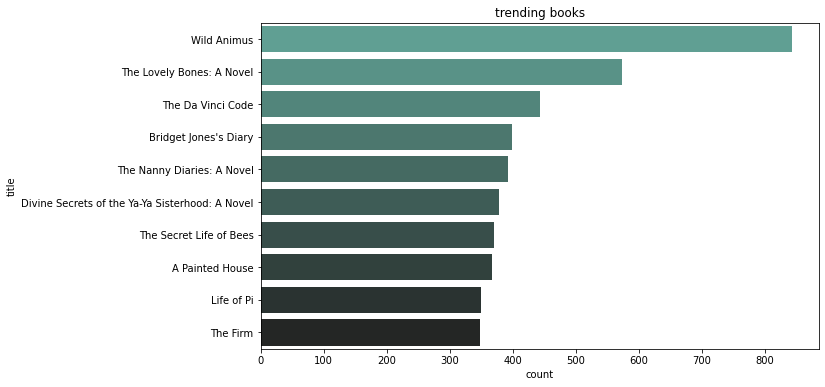

In [ ]:
#Top 10 books
plt.figure(figsize=(10,6))
sns.countplot(y='title',data=final_rating,order=pd.value_counts(final_rating['title']).iloc[:10].index,palette='dark:#5A9_r',)
plt.title('trending books')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution Plot')

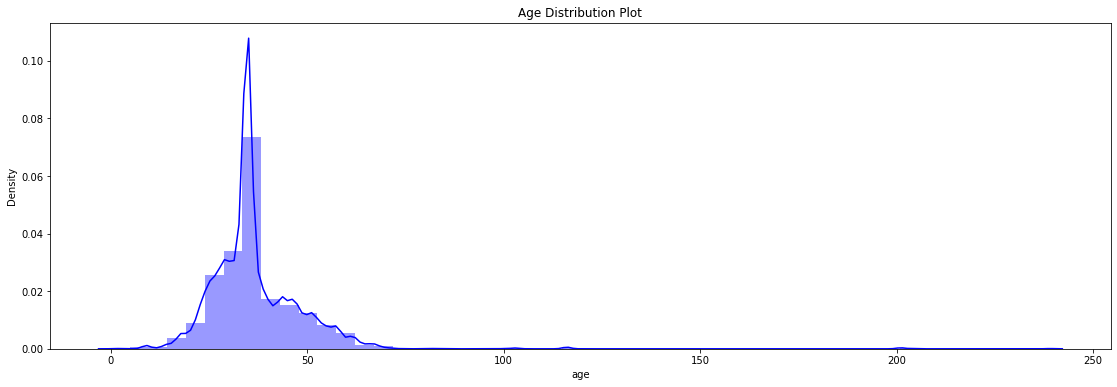

In [ ]:
#Age Distrplt.figure(figsize=(10,6))ibution
plt.figure(figsize=(19,6))
sns.distplot(final_rating['age'],color='blue')
plt.title('Age Distribution Plot')

<Figure size 1440x720 with 0 Axes>

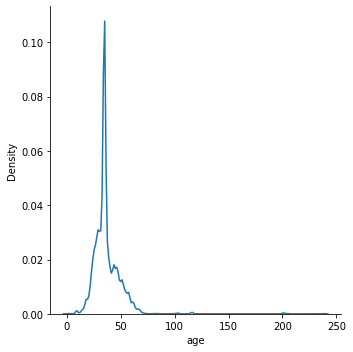

In [ ]:
plt.figure(figsize=(20,10))
sns.displot(data=final_rating, x="age",kind="kde")

Text(0.5, 1.0, 'No of readers from top country ')

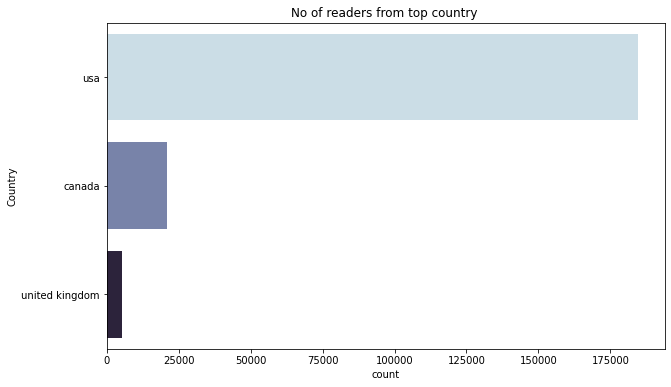

In [ ]:
#most  Active Reader Country
plt.figure(figsize=(10,6))
sns.countplot(y="Country", data=final_rating, order=final_rating['Country'].value_counts().index[0:3],palette='ch:s=.25,rot=-.25')
plt.title("No of readers from top country ")

Pivot table

In [ ]:
book_pivot=final_rating.pivot_table(columns='user_id',index='title',values='bookrating')#creating a table of column has index and value on the basis of rating

In [ ]:
book_pivot

user_id,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
"14,000 Things to Be Happy About",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
"\O\"" Is for Outlaw""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0,inplace=True)#filling nan value

In [ ]:
book_pivot

user_id,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DESIGNING A MOBEL FOR Book Recommender System

In [ ]:
df = pd.DataFrame(final_rating['title'].value_counts())
df['number of ratings'] = df['title']
df['title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = final_rating.merge(df, left_on = 'title', right_on = 'title', how = 'left')
df = df.drop(['publisher','year','age','Country','url'], axis=1)
popularity_threshold = 50
popular_book = df[df['number of ratings_x'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [ ]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['Book-Rating'] = popular_book['bookrating']
testdf['User-ID'] = popular_book['user_id']
testdf = testdf[['User-ID','Book-Rating']].groupby(testdf['ISBN'])

In [ ]:
#Example-Books Name - "Harry Potter and the Order of the Phoenix (Book 5)"
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Order of the Phoenix (Book 5)
Enter number of books to recommend: 4


In [ ]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [ ]:
def printBookDetails(bookID):
    print(final_rating[final_rating['ISBN']==bookID]['title'].values[0])

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if final_rating[final_rating['ISBN']==indexMap[i]]['title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(final_rating[final_rating['ISBN']==indexMap[i]]['title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(final_rating[final_rating['ISBN']==indexMap[i]]['title'].values[0])
    return collaborative

# Collaborative Filtering (User-Item Filtering)

In [ ]:
k = list(final_rating['title'])
m = list(final_rating['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Order of the Phoenix (Book 5)

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)


# Collaborative Filtering Correlation Based

In [ ]:
popularity_threshold = 50

user_count = final_rating['user_id'].value_counts()
data = final_rating[final_rating['user_id'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['bookrating'].value_counts()
data = data[data['bookrating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='user_id', columns='ISBN', values = 'bookrating').fillna(0)

In [ ]:
average_rating = pd.DataFrame(final_rating.groupby('ISBN')['bookrating'].mean())
average_rating['ratingCount'] = pd.DataFrame(rating.groupby('ISBN')['bookrating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookrating,ratingCount
ISBN,,
0971880107,0.527877,844
0316666343,3.493892,574
0385504209,3.806005,434
0060928336,2.374332,375
0312195516,3.376471,341


In [ ]:
bookName = input("Enter a book name: ")

#example= The Horse and His Boy
isbn = books.loc[books['title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n Recommended Books: \n")
corr_books['title']

Enter a book name: The Last Battle

 Recommended Books: 



0       The Voyage of the Dawn Treader (rack) (Narnia)
1                                     The Silver Chair
2                                The Horse and His Boy
3    Prince Caspian (rack) : The Return to Narnia (...
Name: title, dtype: object

# Collaborative Filtering (Nearest Neighbor's Based)

In [ ]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(book_pivot)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
book_pivot.iloc[227:].values.reshape(1,-1)


array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
distances,suggestions= model_knn.kneighbors(book_pivot.iloc[277, :].values.reshape(1,-1))

In [ ]:
suggestions

array([[ 277, 1445, 4607, 4556, 3682]])

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['An Inconvenient Woman', 'Golden Cup', 'Voice of the Heart',
       'Under Gemini', 'The Fig Eater : A Novel'],
      dtype='object', name='title')


In [ ]:
book_pivot.index[326]

'Another Roadside Attraction'

In [ ]:
np.where(book_pivot.index == 'Golden Cup')[0][0]

1445

So Let's find books similar to The Fig Eater : A Novel



In [ ]:
Books_Name=str(input("Pls Entre the Book Name  \n"))

def recommend_book(book_name):
  book_id=np.where(book_pivot.index ==book_name)[0][0]
  distances,suggestions= model_knn.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1,-1))

  for i in range(len(suggestions)):
    if i==0:
      print("The Suggestions for",book_name,'are :\n\n')
      if not i:
        print(book_pivot.index[suggestions[i]])
recommend_book(Books_Name)
#Example-Books Name - "The Fig Eater : A Novel"

Pls Entre the Book Name  
The Fig Eater : A Novel
The Suggestions for The Fig Eater : A Novel are :


Index(['The Fig Eater : A Novel', 'There's A Boy in the Girl's Bathroom',
       'An Inconvenient Woman', 'Coming of Age in Mississippi',
       'The Mosquito Coast'],
      dtype='object', name='title')


In [ ]:
#Let's find books similar to Harry Potter and the Goblet of Fire (Book 4)
Books_Name=str(input("Pls Entre the Book Name  \n"))

def recommend_book(book_name):
  book_id=np.where(book_pivot.index ==book_name)[0][0]
  distances,suggestions= model_knn.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1,-1))

  for i in range(len(suggestions)):
    if i==0:
      print("The Suggestions for",book_name,'are :\n\n')
      if not i:
        print(book_pivot.index[suggestions[i]])
recommend_book(Books_Name)
#Example-Books Name - "Harry Potter and the Goblet of Fire (Book 4)"

Pls Entre the Book Name  
Harry Potter and the Goblet of Fire (Book 4)
The Suggestions for Harry Potter and the Goblet of Fire (Book 4) are :


Index(['Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Sorcerer's Stone (Book 1)'],
      dtype='object', name='title')


# Conclusion
In EDA, the Top-10 most rated books were essentially novels. Books like The Wild Animus and The Lovely Bones: A Novel .
Majority of the readers were of the age bracket 20-50 and most of them came from North American and European countries namely USA, Canada, UK.
If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.
Author with the most books was Stephen King, Nora Roberts and james Patterson.
A recommendation system helps an organization to create loyal customers.
The recommendation system today are very powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profitto the company.